In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
import seaborn as sns
from scipy import stats
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from sklearn.neighbors import KNeighborsClassifier
seed=42

In [3]:
data = pd.read_csv("datass/dataset.csv")
# Rimuovi le righe in base alle condizioni specificate
# data = data[(data['Education_Level'] != 'Unknown') & (data['Income_Category'] != 'Unknown') & (data['Marital_Status'] != 'Unknown')]
data = data[(data['Income_Category'] != 'Unknown')]

data['Attrition_Flag'] = data.Attrition_Flag.map({'Attrited Customer': 1,
                                               'Existing Customer': 0})
data['Attrition_Flag'].value_counts(normalize=True)

Attrition_Flag
0    0.840266
1    0.159734
Name: proportion, dtype: float64

In [4]:
variables_to_keep = [
    'Dependent_count',
    'Total_Relationship_Count',
    'Months_Inactive_12_mon',
    'Contacts_Count_12_mon',
    'Total_Trans_Ct',
    'Avg_Utilization_Ratio',
    'Gender',
    'Income_Category'
]
data_subset = data.loc[:, variables_to_keep]

In [5]:
x = data_subset
y = pd.DataFrame(data['Attrition_Flag'])

categorical_columns = ['Gender', 'Income_Category']

x_encoded = pd.get_dummies(x, columns=categorical_columns)

In [6]:
x_train, x_val, y_train, y_val = train_test_split(x_encoded, y, test_size=0.2, random_state=seed, shuffle=True)

In [7]:
print('K-Nearest Neighbors')
clf = KNeighborsClassifier()
scaler = StandardScaler()

x_train_scaled = scaler.fit_transform(x_train)
clf.fit(x_train_scaled, y_train)

x_val_scaled = scaler.transform(x_val)
y_hat = clf.predict(x_val_scaled)

accuracy = accuracy_score(y_val, y_hat)
confusion = confusion_matrix(y_val, y_hat)

print(f'Accuracy: {accuracy:.2f}')
print('Confusion Matrix:')
print(confusion)

K-Nearest Neighbors
Accuracy: 0.89
Confusion Matrix:
[[1459   58]
 [ 139  147]]


C:\Users\Leonardo\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\neighbors\_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


In [8]:
res=[]
for n_neighbors in range(1, 11):
    for weights in ['uniform', 'distance']:
        clf = KNeighborsClassifier(n_neighbors=n_neighbors, weights=weights)
        scaler = StandardScaler()

        x_train_scaled = scaler.fit_transform(x_train)
        clf.fit(x_train_scaled, y_train)
        y_hat = clf.predict(scaler.transform(x_val))

        accuracy = accuracy_score(y_val, y_hat)
        precision = precision_score(y_val, y_hat)
        recall = recall_score(y_val, y_hat)
        f1 = f1_score(y_val, y_hat)

        print(f'{n_neighbors=}, {weights=}, {accuracy=}, {precision=}, {recall=}, {f1=}')
        res.append({
            'n_neighbors': n_neighbors,
            'weights': weights,
            'Accuracy': accuracy,
            'Precision': precision,
            'Recall': recall,
            'F1-score': f1
        })

C:\Users\Leonardo\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\neighbors\_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\Leonardo\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\neighbors\_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


n_neighbors=1, weights='uniform', accuracy=0.8685524126455907, precision=0.5865724381625441, recall=0.5804195804195804, f1=0.5834797891036907
n_neighbors=1, weights='distance', accuracy=0.8685524126455907, precision=0.5865724381625441, recall=0.5804195804195804, f1=0.5834797891036907


C:\Users\Leonardo\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\neighbors\_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\Leonardo\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\neighbors\_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


n_neighbors=2, weights='uniform', accuracy=0.8807542983915696, precision=0.75177304964539, recall=0.3706293706293706, f1=0.49648711943793905
n_neighbors=2, weights='distance', accuracy=0.8679977814753189, precision=0.5851063829787234, recall=0.5769230769230769, f1=0.5809859154929577


C:\Users\Leonardo\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\neighbors\_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\Leonardo\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\neighbors\_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


n_neighbors=3, weights='uniform', accuracy=0.8824181919023849, precision=0.6637168141592921, recall=0.5244755244755245, f1=0.5859375
n_neighbors=3, weights='distance', accuracy=0.8813089295618414, precision=0.6565217391304348, recall=0.527972027972028, f1=0.5852713178294574


C:\Users\Leonardo\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\neighbors\_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\Leonardo\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\neighbors\_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


n_neighbors=4, weights='uniform', accuracy=0.8912922906267332, precision=0.7884615384615384, recall=0.43006993006993005, f1=0.5565610859728507
n_neighbors=4, weights='distance', accuracy=0.8801996672212978, precision=0.6495726495726496, recall=0.5314685314685315, f1=0.5846153846153845


C:\Users\Leonardo\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\neighbors\_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\Leonardo\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\neighbors\_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


n_neighbors=5, weights='uniform', accuracy=0.8907376594564614, precision=0.7170731707317073, recall=0.513986013986014, f1=0.5987780040733197
n_neighbors=5, weights='distance', accuracy=0.8857459789240155, precision=0.6869158878504673, recall=0.513986013986014, f1=0.588


C:\Users\Leonardo\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\neighbors\_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\Leonardo\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\neighbors\_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


n_neighbors=6, weights='uniform', accuracy=0.8929561841375485, precision=0.7818181818181819, recall=0.45104895104895104, f1=0.5720620842572062
n_neighbors=6, weights='distance', accuracy=0.8868552412645591, precision=0.6952380952380952, recall=0.5104895104895105, f1=0.5887096774193548


C:\Users\Leonardo\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\neighbors\_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\Leonardo\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\neighbors\_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


n_neighbors=7, weights='uniform', accuracy=0.8946200776483638, precision=0.7474226804123711, recall=0.506993006993007, f1=0.6041666666666666
n_neighbors=7, weights='distance', accuracy=0.8879645036051026, precision=0.7121212121212122, recall=0.493006993006993, f1=0.5826446280991735


C:\Users\Leonardo\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\neighbors\_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\Leonardo\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\neighbors\_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


n_neighbors=8, weights='uniform', accuracy=0.8912922906267332, precision=0.78125, recall=0.4370629370629371, f1=0.5605381165919282
n_neighbors=8, weights='distance', accuracy=0.8885191347753744, precision=0.7135678391959799, recall=0.4965034965034965, f1=0.5855670103092784


C:\Users\Leonardo\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\neighbors\_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


n_neighbors=9, weights='uniform', accuracy=0.894065446478092, precision=0.7624309392265194, recall=0.4825174825174825, f1=0.5910064239828694
n_neighbors=9, weights='distance', accuracy=0.8901830282861897, precision=0.7291666666666666, recall=0.48951048951048953, f1=0.5857740585774058


C:\Users\Leonardo\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\neighbors\_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\Leonardo\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\neighbors\_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


n_neighbors=10, weights='uniform', accuracy=0.8957293399889074, precision=0.80625, recall=0.45104895104895104, f1=0.57847533632287
n_neighbors=10, weights='distance', accuracy=0.8935108153078203, precision=0.7422680412371134, recall=0.5034965034965035, f1=0.6000000000000001


C:\Users\Leonardo\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\neighbors\_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


In [9]:
res_df = pd.DataFrame(res)
sorted_df = res_df.sort_values('Recall', ascending=False)
sorted_df

,n_neighbors,weights,Accuracy,Precision,Recall,F1-score
0,1,uniform,0.868552,0.586572,0.580420,0.583480
1,1,distance,0.868552,0.586572,0.580420,0.583480
3,2,distance,0.867998,0.585106,0.576923,0.580986
7,4,distance,0.880200,0.649573,0.531469,0.584615
5,3,distance,0.881309,0.656522,0.527972,0.585271
4,3,uniform,0.882418,0.663717,0.524476,0.585938
8,5,uniform,0.890738,0.717073,0.513986,0.598778
9,5,distance,0.885746,0.686916,0.513986,0.588000
11,6,distance,0.886855,0.695238,0.510490,0.588710
12,7,uniform,0.894620,0.747423,0.506993,0.604167


In [10]:
res_df.iloc[res_df.Recall.argmax()]

n_neighbors           1
weights         uniform
Accuracy       0.868552
Precision      0.586572
Recall          0.58042
F1-score        0.58348
Name: 0, dtype: object

In [11]:
n_neighbors=1
weights='uniform'

In [12]:
print(f'K-Nearest Neighbors, {n_neighbors=}, {weights=}')
clf = KNeighborsClassifier(n_neighbors=n_neighbors, weights=weights)
scaler = StandardScaler()

x_train_scaled = scaler.fit_transform(x_train)
clf.fit(x_train_scaled, y_train)

x_val_scaled = scaler.transform(x_val)
y_hat_val = clf.predict(x_val_scaled)
accuracy_val = accuracy_score(y_val, y_hat_val)
precision_val = precision_score(y_val, y_hat_val)
recall = recall_score(y_val, y_hat_val)
print(f'VAL: {accuracy_val=}, {recall=}')


K-Nearest Neighbors, n_neighbors=1, weights='uniform'
VAL: accuracy_val=0.8685524126455907, recall=0.5804195804195804


C:\Users\Leonardo\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\neighbors\_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


In [13]:
confusion_val = confusion_matrix(y_val, y_hat_val)
print(confusion_val)

[[1400  117]
 [ 120  166]]


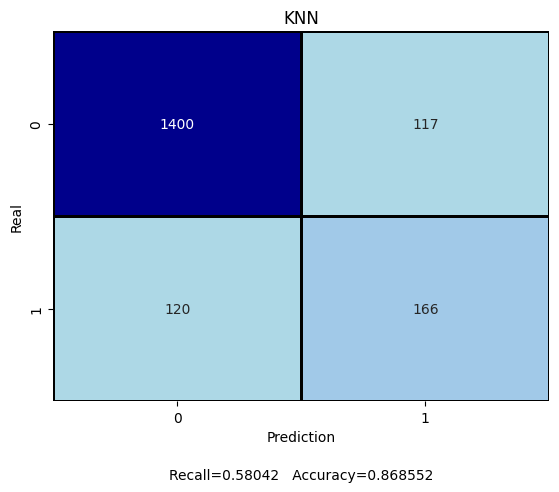

In [14]:
import matplotlib.colors as colors

# Definisci la tua colormap personalizzata con tonalità di blu
custom_cmap = colors.LinearSegmentedColormap.from_list(
    'custom_blues', ['#ADD8E6', '#0000FF','#00008B'])

# Calcola la matrice di confusione
cm = confusion_matrix(y_val, y_hat_val)

# Crea la heatmap utilizzando la colormap personalizzata
sns.heatmap(cm, annot=True, fmt='.0f', cmap=custom_cmap, cbar=False, linecolor='Black', linewidths='1')

plt.ylabel('Real')
plt.xlabel('Prediction')
plt.title('KNN')
plt.text(0.5, -0.2, 'Recall=0.58042   Accuracy=0.868552', ha='center', va='center', transform=plt.gca().transAxes)

plt.show()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


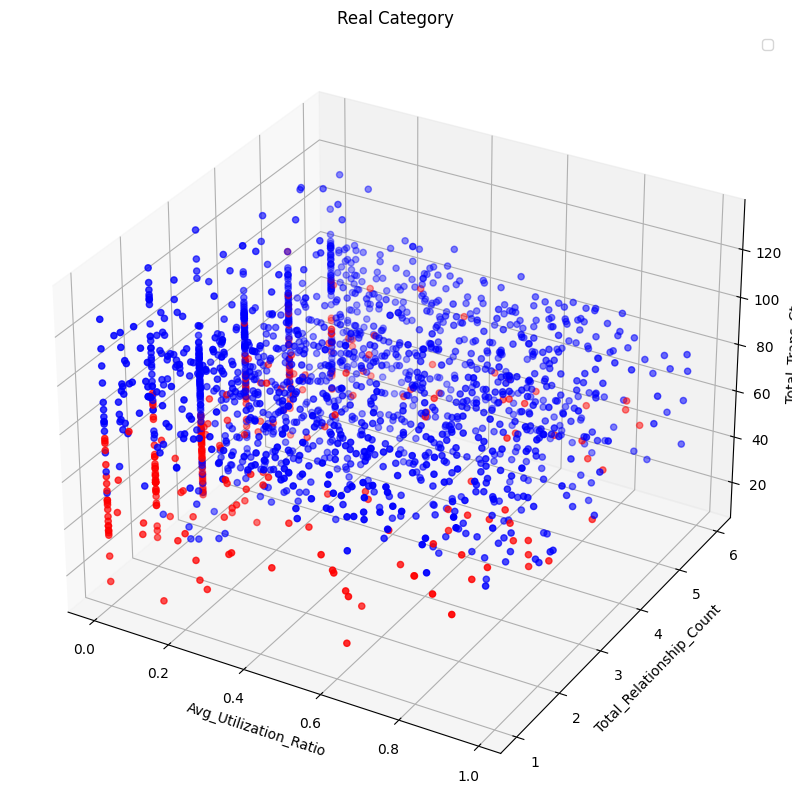

In [15]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Supponiamo che x_train sia una matrice con 3 features (x1, x2, x3)
# y_train sia l'array delle etichette di classe reali
# y_pred sia l'array delle etichette di classe predette

# Creazione del grafico tridimensionale
fig = plt.figure(figsize=(13, 10))
ax = fig.add_subplot(111, projection='3d')

# Estrazione delle features
x1 = x_val['Avg_Utilization_Ratio']
x2 = x_val['Total_Relationship_Count']
x3 = x_val['Total_Trans_Ct']


# Tracciamento dei punti dei dati
custom_cmap = colors.LinearSegmentedColormap.from_list(
    'custom_blues', ['blue', 'red'])

ax.scatter(x1, x2, x3, c=y_val, cmap=custom_cmap)

# Etichettatura degli assi
ax.set_xlabel('Avg_Utilization_Ratio')
ax.set_ylabel('Total_Relationship_Count')
ax.set_zlabel('Total_Trans_Ct')
ax.set_title('Real Category')
ax.legend()
# Visualizzazione del grafico
plt.show()

C:\Users\Leonardo\AppData\Local\Temp\ipykernel_18052\1486662478.py:24: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  ax.scatter(x1[np.where(True_Positive)[1]], x2[np.where(True_Positive)[1]], x3[np.where(True_Positive)[1]], c='red', cmap='cool', label='True Positive')
C:\Users\Leonardo\AppData\Local\Temp\ipykernel_18052\1486662478.py:25: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  ax.scatter(x1[np.where(True_Negative)[1]], x2[np.where(True_Negative)[1]], x3[np.where(True_Negative)[1]], c='blue', cmap='cool', label='True Negative')
C:\Users\Leonardo\AppData\Local\Temp\ipykernel_18052\1486662478.py:26: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  ax.scatter(x1[np.where(False_Positive)[1]], x2[np.where(False_Positive)[1]], x3[np.where(False_Positive)[1]], c='aqua', cmap='cool', label='False Positive')
C:\Users\Leonardo\AppData\Local\Temp\ipykernel_18

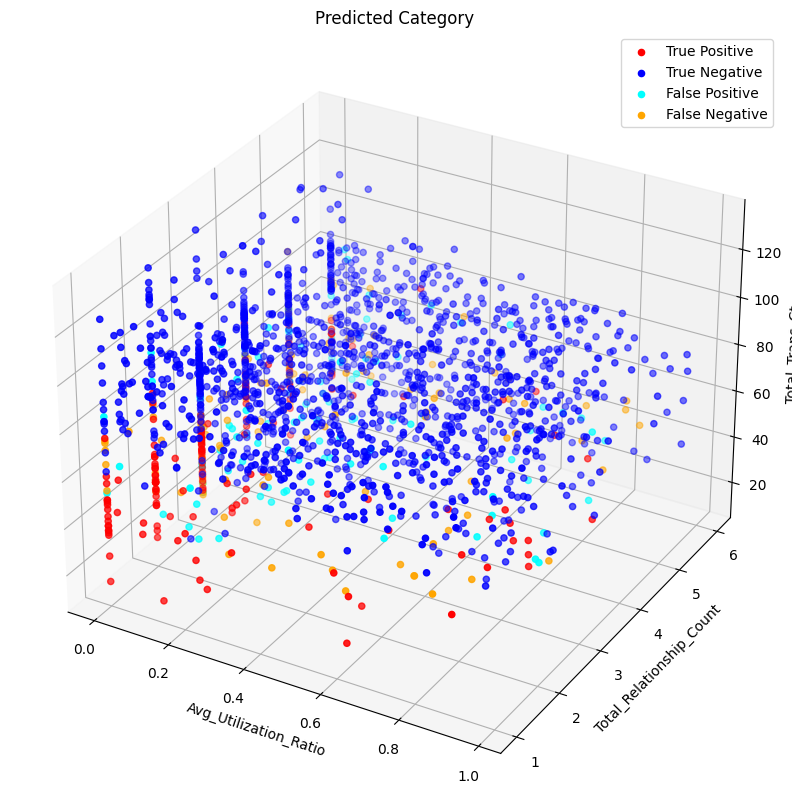

In [16]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Supponiamo che x_train sia una matrice con 3 features (x1, x2, x3)
# y_train sia l'array delle etichette di classe reali
# y_pred sia l'array delle etichette di classe predette

# Creazione del grafico tridimensionale
fig = plt.figure(figsize=(13, 10))
ax = fig.add_subplot(111, projection='3d')
x1 = np.array(x_val['Avg_Utilization_Ratio'])
x2 = np.array(x_val['Total_Relationship_Count'])
x3 = np.array(x_val['Total_Trans_Ct'])
y_val_equals_1 = (np.array(y_val).transpose() == 1)
y_hat_equals_1 = (y_hat_val == 1)
y_val_equals_0 = (np.array(y_val).transpose() == 0)
y_hat_equals_0 = (y_hat_val == 0)
True_Positive = np.logical_and(y_val_equals_1, y_hat_equals_1)
True_Negative = np.logical_and(y_val_equals_0, y_hat_equals_0)
False_Positive = np.logical_and(y_val_equals_0, y_hat_equals_1)
False_Negative = np.logical_and(y_val_equals_1, y_hat_equals_0)

# Tracciamento dei punti dei dati con etichette reali
ax.scatter(x1[np.where(True_Positive)[1]], x2[np.where(True_Positive)[1]], x3[np.where(True_Positive)[1]], c='red', cmap='cool', label='True Positive')
ax.scatter(x1[np.where(True_Negative)[1]], x2[np.where(True_Negative)[1]], x3[np.where(True_Negative)[1]], c='blue', cmap='cool', label='True Negative')
ax.scatter(x1[np.where(False_Positive)[1]], x2[np.where(False_Positive)[1]], x3[np.where(False_Positive)[1]], c='aqua', cmap='cool', label='False Positive')
ax.scatter(x1[np.where(False_Negative)[1]], x2[np.where(False_Negative)[1]], x3[np.where(False_Negative)[1]], c='orange', cmap='cool', label='False Negative')

# Etichettatura degli assi
ax.set_xlabel('Avg_Utilization_Ratio')
ax.set_ylabel('Total_Relationship_Count')
ax.set_zlabel('Total_Trans_Ct')
ax.legend()
ax.set_title('Predicted Category')
# Visualizzazione del grafico
plt.show()